<a href="https://colab.research.google.com/github/ShramanPal/Stock-Finder/blob/master/up_down.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from random import randint
from random import seed
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as cns
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import keras as K
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Activation, Dropout, Input, Concatenate, BatchNormalization
from keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
adani = pd.read_csv("/content/drive/My Drive/ADANIPORTS.csv")

In [7]:
open = adani["Open"]
vol = adani["Volume"]
close = adani["Close"]
high = adani["High"]
low = adani["Low"]

In [21]:
open1 = np.array(open[0:-1])           #opening prices from day 1 to day n-1
open2 = np.array(open[1:])             #opening prices from day 2 to day n
close1 = np.array(close[0:-1])         #closing prices from day 1 to day n-1
close2 = np.array(close[1:])           #closing prices from day 2 to day n
high1 = np.array(high[0:-1])           #high prices from day 1 to day n-1
high2 = np.array(high[1:])             #high prices from day 2 to day n
low1 = np.array(low[0:-1])             #low prices from day 1 to day n-1
low2 = np.array(low[1:])               #low prices from day 2 to day n
open_changes = open2 - open1           #opening prices changes day(n) - day(n-1)
close_changes = close2 - close1        #close prices changes day(n) - day(n-1)
high_changes = high2 - high1           #high prices changes day(n) - day(n-1)
low_changes = low2 - low1              #low prices changes day(n) - day(n-1)
vol1 = np.array(vol[0:-1])             #volumes from day 1 to day n-1
vol2 = np.array(vol[1:])               #volumes from day 2 to day n
volume_changes = vol2 - vol1           #volume changes day(n) - day(n-1)
close_train_label = []
close_test_label = []
close_label = []

for k in range(1,3090):                     #categorizing close price changes starting from (day3 - day2)/day2
  if close_changes[k]/close1[k] > 0.01:     #UP
    close_label.append([2])
  elif close_changes[k]/close1[k] < -0.01:  #DOWN
    close_label.append([0])
  else:                                     #NEUTRAL
    close_label.append([1])
print(np.array(close_label).shape)

Open train:  (2500, 120, 1)
Close train:  (2500, 120, 1)
High train:  (2500, 120, 1)
Low train:  (2500, 120, 1)
Vol Train:  (2500, 120, 1)
Close train Label:  (2500, 1)
Open test:  (300, 120, 1)
Close test:  (300, 120, 1)
High test:  (300, 120, 1)
Low test:  (300, 120, 1)
Vol Test:  (300, 120, 1)
Close test label:  (300, 1)
Close train label unique values:  (array([0, 1, 2]), array([ 717, 1041,  742]))
Close test unique values:  (array([0, 1, 2]), array([ 75, 154,  71]))
(3089, 1)


In [17]:
print(open_changes.shape)

(3089,)


In [35]:
ratio1 = high1/low1                                 #checking which ratios give good correlation with close label
ratio2 = high1/close1                                      
ratio3 = low1/open1                                        
ratio4 = low1/close1
ratio5 = close2/vol2
print(f_classif(open1[0:-1].reshape(-1,1),close_label))
print(f_classif(open2[0:-1].reshape(-1,1),close_label))
print(f_classif(open_changes[0:-1].reshape(-1,1),close_label))   
print(f_classif(close1[0:-1].reshape(-1,1),close_label))
print(f_classif(close2[0:-1].reshape(-1,1),close_label))
print(f_classif(close_changes[0:-1].reshape(-1,1),close_label))  
print(f_classif(high1[0:-1].reshape(-1,1),close_label))
print(f_classif(high2[0:-1].reshape(-1,1),close_label))
print(f_classif(high_changes[0:-1].reshape(-1,1),close_label))   
print(f_classif(low1[0:-1].reshape(-1,1),close_label))
print(f_classif(low2[0:-1].reshape(-1,1),close_label))
print(f_classif(low_changes[0:-1].reshape(-1,1),close_label))   
print(f_classif(vol1[0:-1].reshape(-1,1),close_label))
print(f_classif(vol2[0:-1].reshape(-1,1),close_label))           
print(f_classif(volume_changes[0:-1].reshape(-1,1),close_label)) 
print("Ratio 3: ",f_classif(ratio5[0:-1].reshape(-1,1),close_label))         

(array([2.40624809]), array([0.09032204]))
(array([2.16391945]), array([0.11504827]))
(array([1.29775849]), array([0.27329239]))
(array([2.36163947]), array([0.0944359]))
(array([1.99796601]), array([0.13578621]))
(array([2.17506256]), array([0.11377517]))
(array([2.52559389]), array([0.08017615]))
(array([2.2534337]), array([0.10521075]))
(array([1.16326522]), array([0.31260122]))
(array([2.35268911]), array([0.09528363]))
(array([1.98037284]), array([0.13819313]))
(array([2.42016918]), array([0.0890753]))
(array([0.94721154]), array([0.38793366]))
(array([0.80480581]), array([0.44726859]))
(array([0.68921541]), array([0.50204701]))
Ratio 3:  (array([1.40574883]), array([0.24534035]))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [41]:
feature1 = high2/low2
feature2 = high2/close2
feature3 = low2/close2
feature4 = high2/open2
feature5 = low2/open2

[0.88821138 0.92519252 1.         ... 1.         0.99377845 0.97590909]


In [58]:
#feature5 = (feature5 - feature5.mean())/feature5.std() * 10
#feature6 = (feature6 - feature6.mean())/feature6.std() * 10
#feature7 = (feature7 - feature7.mean())/feature7.std() * 10
f1_train,f2_train,f3_train,f4_train,f5_train,f1_test,f2_test,f3_test,f4_test,f5_test,close_train_label, close_test_label = [],[],[],[],[],[],[],[],[],[],[],[]
for k in range(0,2500):                                        #creating time steps samples: time_steps = 300, samples = 2500
  f1_train.append([[feature1[k + i]]for i in range(300)])
  f2_train.append([[feature2[k + i]]for i in range(300)])
  f3_train.append([[feature3[k + i]]for i in range(300)])
  f4_train.append([[feature4[k + i]]for i in range(300)])
  f5_train.append([[feature5[k + i]]for i in range(300)])
  #f6_train.append([[feature6[k + i]]for i in range(150)])
  #f7_train.append([[feature7[k + i]]for i in range(150)])
  close_train_label.append(close_label[k + 300])
for k in range(2500,2789):                                     #creating time steps samples for test: time_steps = 300, samples = 289
  f1_test.append([[feature1[k + i]]for i in range(300)])
  f2_test.append([[feature2[k + i]]for i in range(300)])
  f3_test.append([[feature3[k + i]]for i in range(300)])
  f4_test.append([[feature4[k + i]]for i in range(300)])
  f5_test.append([[feature5[k + i]]for i in range(300)])
  #f6_test.append([[feature6[k + i]]for i in range(150)])
  #f7_test.append([[feature7[k + i]]for i in range(150)])
  close_test_label.append(close_label[k + 300])

f1_train = np.array(f1_train)
close_train_label = np.array(to_categorical(close_train_label))
f2_train = np.array(f2_train)
f3_train = np.array(f3_train)
f4_train = np.array(f4_train)
f5_train = np.array(f5_train)
f1_test = np.array(f1_test)
f2_test = np.array(f1_test)
f3_test = np.array(f1_test)
f4_test = np.array(f1_test)
f5_test = np.array(f5_test)
close_test_label = np.array(to_categorical(close_test_label))


In [59]:
print(close_train_label.shape)
print(f5_train.shape)

(2500, 3)
(2500, 300, 1)


In [62]:
def feature_model():
  adam = Adam(lr = 0.001, beta_1 = 0.99, beta_2 = 0.999)
  initializer = K.initializer.glorot_normal()
  regularizer = l2(0.0003)

  f1_layer = Input(shape = (300,1), name = "f1_input_layer")
  f2_layer = Input(shape = (300,1), name = "f2_input_layer")
  f3_layer = Input(shape = (300,1), name = "f3_input_layer")
  f4_layer = Input(shape = (300,1), name = "f4_input_layer")
  f5_layer = Input(shape = (300,1), name = "f5_input_layer")

  f1_lstm = LSTM(units = 150, batch_input_shape = (None, 300, 1))(f1_layer)
  f2_lstm = LSTM(units = 150, batch_input_shape = (None, 300, 1))(f2_layer)
  f3_lstm = LSTM(units = 150, batch_input_shape = (None, 300, 1))(f3_layer)
  f4_lstm = LSTM(units = 150, batch_input_shape = (None, 300, 1))(f4_layer)
  f5_lstm = LSTM(units = 150, batch_input_shape = (None, 300, 1))(f5_layer)

  f1_dense = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f1_lstm)
  f2_dense = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f2_lstm)
  f3_dense = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f3_lstm)
  f4_dense = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f4_lstm)
  f5_dense = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f5_lstm)

  f1_dense = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f1_dense)
  f1_dense = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f2_dense)
  f1_dense = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f3_dense)
  f1_dense = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f4_dense)
  f1_dense = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(f5_dense)

  output = Concatenate()([f1_dense,f2_dense,f3_dense,f4_dense,f5_dense])
  output = Dense(1200, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(500, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(300, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(128, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(64, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(64, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(32, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(16, activation = "relu", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)
  output = Dense(3, activation = "softmax", kernel_initializer = initializer, kernel_regularizer = regularizer)(output)

  model = Model(inputs = [f1_layer, f2_layer, f3_layer, f4_layer, f5_layer], outputs = output)
  model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = [K.Precision(class_id = 0), K.Recall(class_id = 0), K.Precision(class_id = 1), K.Recall(class_id = 1), K.Precision(class_id = 2), K.Recall(class_id = 2)])
  print(model.summary())
  return model

In [ ]:
callback = K.callbacks.EarlyStopping(monitor = "loss", patience = 10, min_delta = 0.0001, restore_best_weights = True)
lstm = feature_model()
history = lstm.fit([f1_train, f2_train, f3_train, f4_train, f5_train], close_train_label, epochs = 150, validation_split = 0.2, batch_size = 100)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feature_1 (InputLayer)          (None, 300, 1)       0                                            
__________________________________________________________________________________________________
feature_2 (InputLayer)          (None, 300, 1)       0                                            
__________________________________________________________________________________________________
feature_3 (InputLayer)          (None, 300, 1)       0                                            
__________________________________________________________________________________________________
feature_4 (InputLayer)          (None, 300, 1)       0                                            
____________________________________________________________________________________________

In [ ]:
epsilon = 0.000001
score = lstm.evaluate([f1_test, f2_test, f3_test, f4_test, f5_test], np.array(close_test_label))
print("Individual Scores: ", score)
print("F1 Score of Down: ", (2*score[1]*score[4])/(score[1] + score[4] + epsilon))
print("F1 Score of Up: ", (2*score[3]*score[6])/(score[3] + score[6] + epsilon))
print("F1 Score of Neutral: ", (2*score[2]*score[5])/(score[2] + score[5] + epsilon))


ValueError: ignored

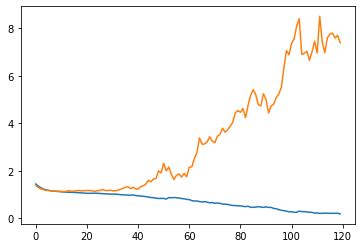

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

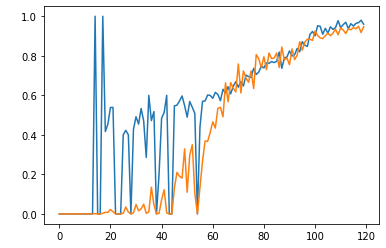

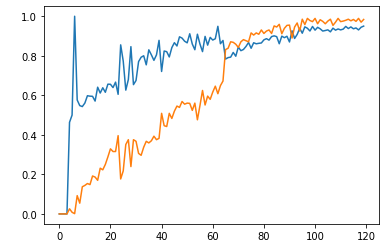

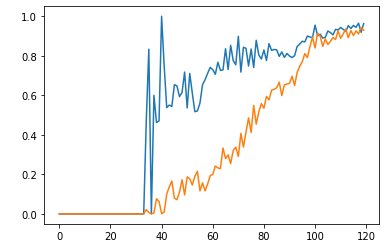

In [ ]:
k = 1
plt.plot(history.history["precision_"+str(k)])
plt.plot(history.history["recall_"+str(k)])
plt.ylabel("Down", color = "w")
plt.show()
plt.plot(history.history["precision_" + str(k + 1)])
plt.plot(history.history["recall_" + str(k + 1)])
plt.ylabel("Neutral", color = "w")
plt.show()
plt.plot(history.history["precision_" + str(k + 2)])
plt.plot(history.history["recall_" + str(k + 2)])
plt.ylabel("Up", color = "w")
plt.show()

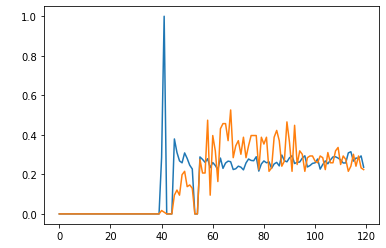

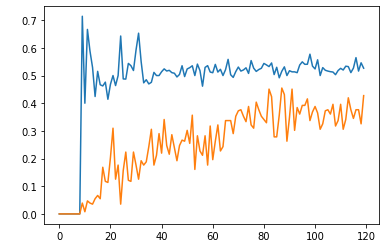

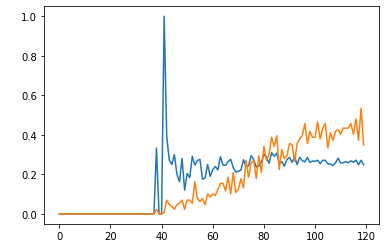

In [ ]:
plt.plot(history.history["val_precision_" + str(k)])
plt.plot(history.history["val_recall_" + str(k)])
plt.ylabel("Down", color = "w")
plt.show()
plt.plot(history.history["val_precision_" + str(k + 1)])
plt.plot(history.history["val_recall_" + str(k + 1)])
plt.ylabel("Neutral", color = "w")
plt.show()
plt.plot(history.history["val_precision_" + str(k + 2)])
plt.plot(history.history["val_recall_" + str(k + 2)])
plt.ylabel("Up", color = "w")
plt.show()

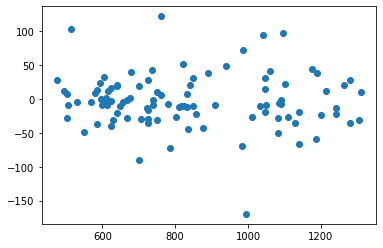

In [ ]:
plt.scatter(open2[:100], close_changes[:100])

In [ ]:
upsdowns = []
for i in range(2000,3090):
  if open_changes[i]>0:
    upsdowns.append(2)
  elif open_changes[i] == 0:
    upsdowns.append(1)
  else:
    upsdowns.append(0)
print(np.unique(np.array(upsdowns),return_counts = True))

(array([0, 1, 2]), array([525,   8, 557]))


In [ ]:
upsdowns = []
for i in range(3090):
  if open_changes[i]>0:
    upsdowns.append(2)
  elif open_changes[i] == 0:
    upsdowns.append(1)
  else:
    upsdowns.append(0)
print(np.unique(np.array(upsdowns),return_counts = True))

(array([0, 1, 2]), array([1529,   43, 1518]))
